In [1]:
import xarray as xr
import rasterio as rio
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, gdal_array
from scipy.interpolate import interpn
import os

In [45]:
igram_date = '20230725_20230925'
swatch = 'swatch_00540'
work_dir = f'/mnt/Backups/gbrench/repos/rg_uavsar/data/{swatch}/Igrams/{igram_date}'
unwrapped_fn = f'{work_dir}/filt_{igram_date}_snaphu.unw'
wrapped_fn = f'{work_dir}/filt_{igram_date}.int'
cor_fn = f'{work_dir}/filt_{igram_date}.cor'
components_fn = f'{work_dir}/filt_{igram_date}_snaphu.unw.conncomp'

In [46]:
wrapped_ds = gdal.Open(wrapped_fn, gdal.GA_ReadOnly)
wrapped = wrapped_ds.GetRasterBand(1).ReadAsArray()

cor_ds = gdal.Open(cor_fn, gdal.GA_ReadOnly)
cor = cor_ds.GetRasterBand(1).ReadAsArray()

unwrapped_ds = gdal.Open(unwrapped_fn, gdal.GA_ReadOnly)
unwrapped = unwrapped_ds.GetRasterBand(2).ReadAsArray()

# components_ds = gdal.Open(components_fn, gdal.GA_ReadOnly)
# components = components_ds.GetRasterBand(1).ReadAsArray()

In [35]:
wrapped.shape

(9566, 3061)

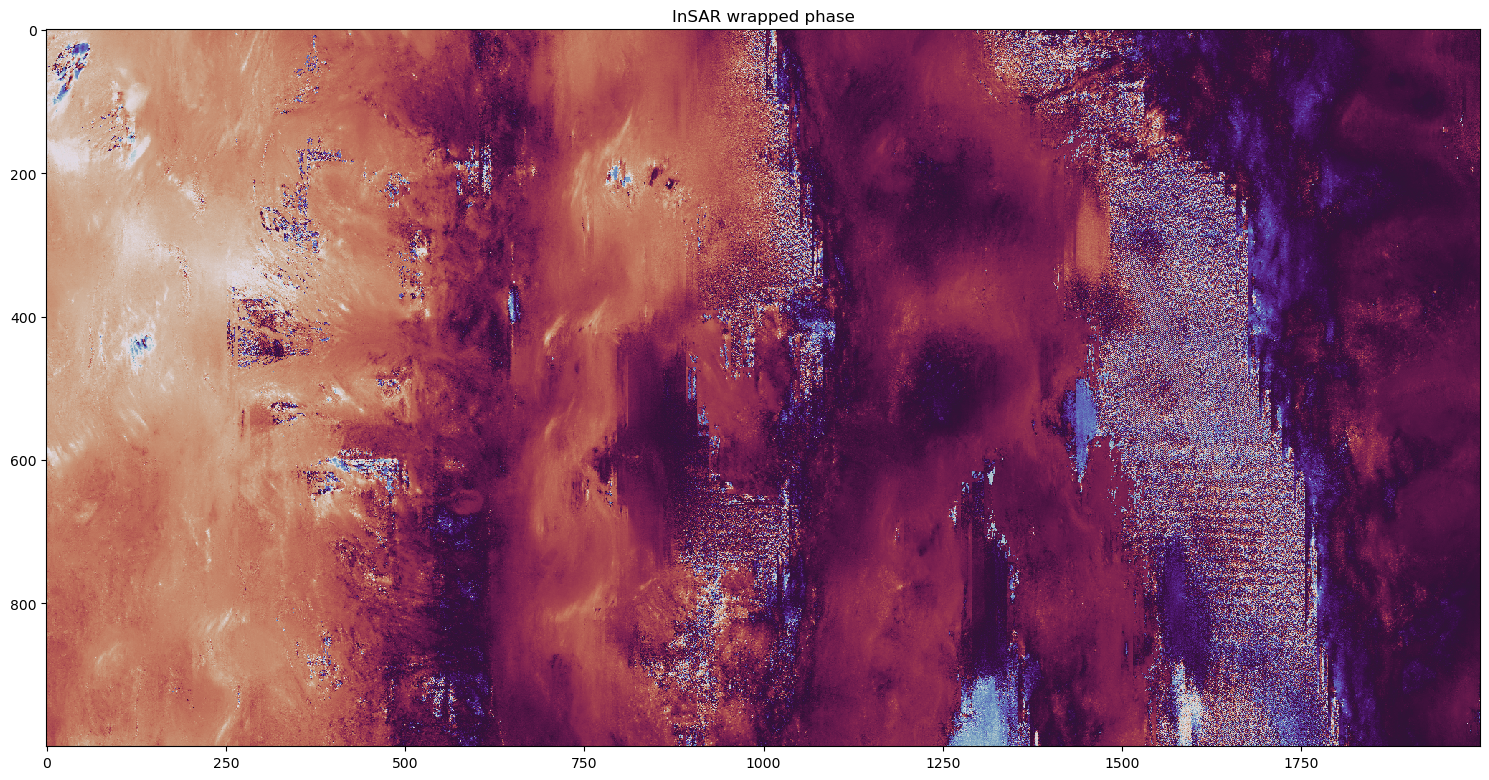

In [63]:
f, ax = plt.subplots(figsize=(15, 15))
ax.imshow(np.angle(wrapped)[7000:8000, 500:2500], cmap='twilight', interpolation='none')
ax.set_title('InSAR wrapped phase')
f.tight_layout()

In [48]:
unwrapped.min()

-135.73653

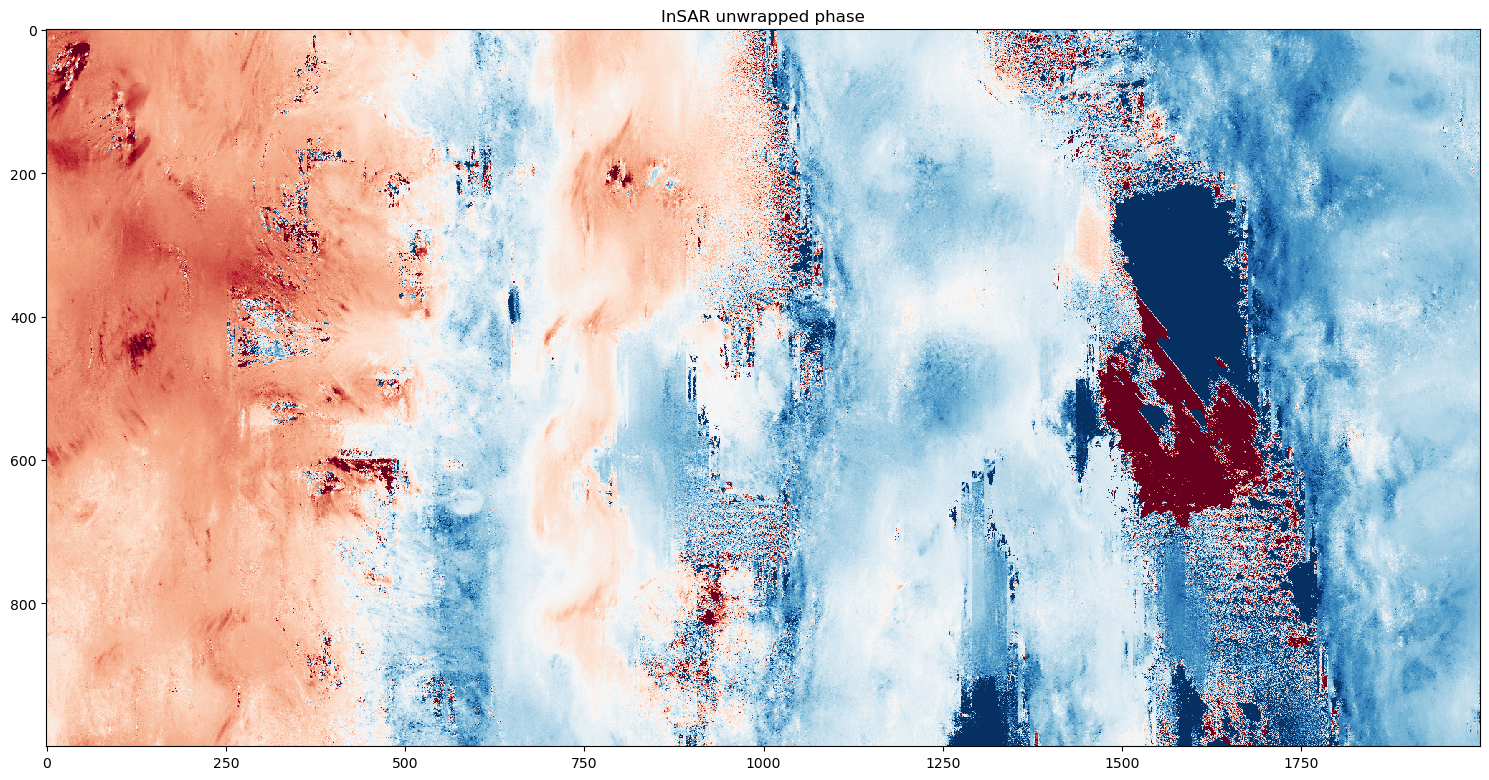

In [61]:
f, ax = plt.subplots(figsize=(15, 15))
ax.imshow(unwrapped[7000:8000, 500:2500], cmap='RdBu_r', vmin=5, vmax=10, interpolation='none')
ax.set_title('InSAR unwrapped phase')
f.tight_layout()

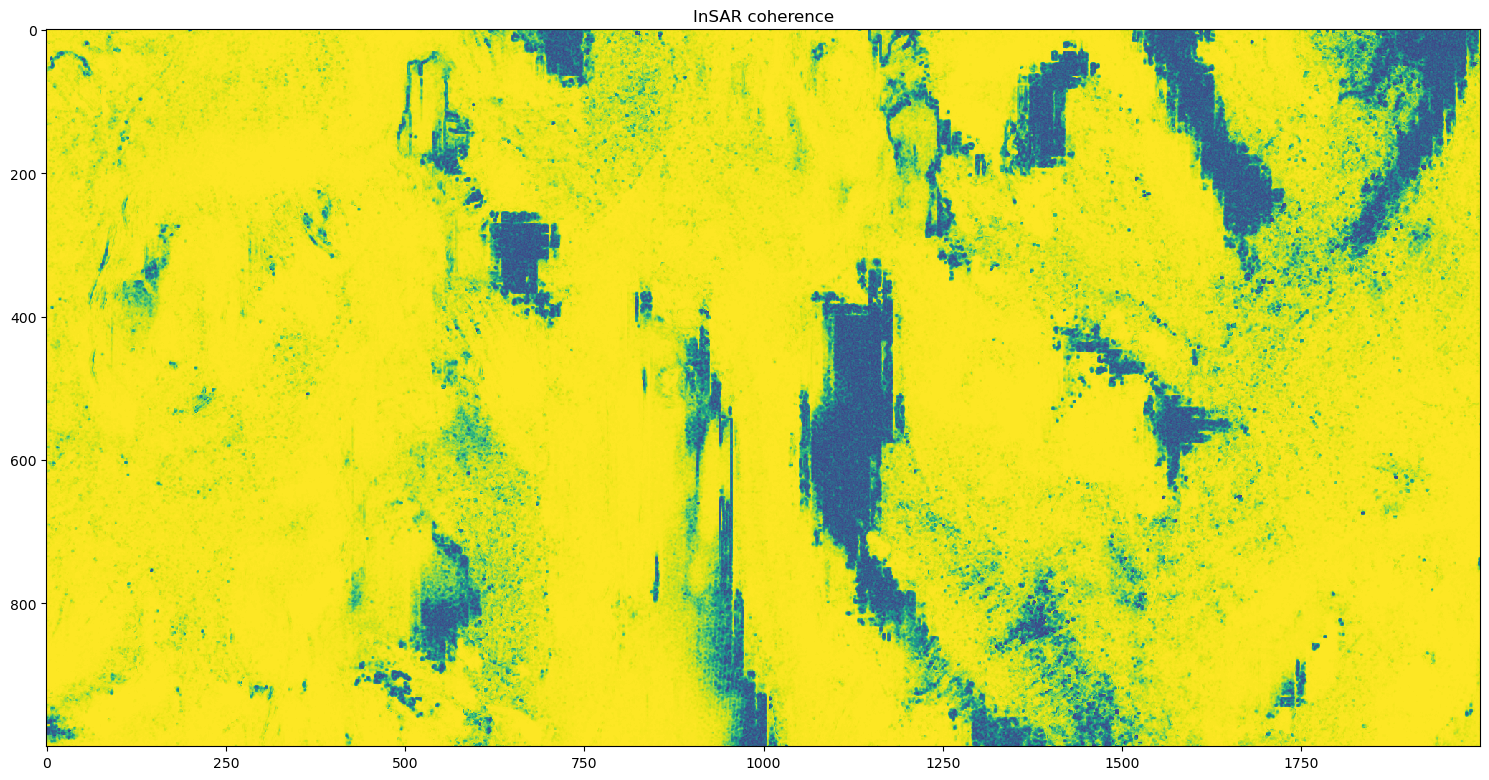

In [65]:
f, ax = plt.subplots(figsize=(15, 15))
ax.imshow(cor[6000:7000, 500:2500], cmap='viridis', vmin=0.0, vmax=1, interpolation='none')
ax.set_title('InSAR coherence')
f.tight_layout()

NameError: name 'components' is not defined

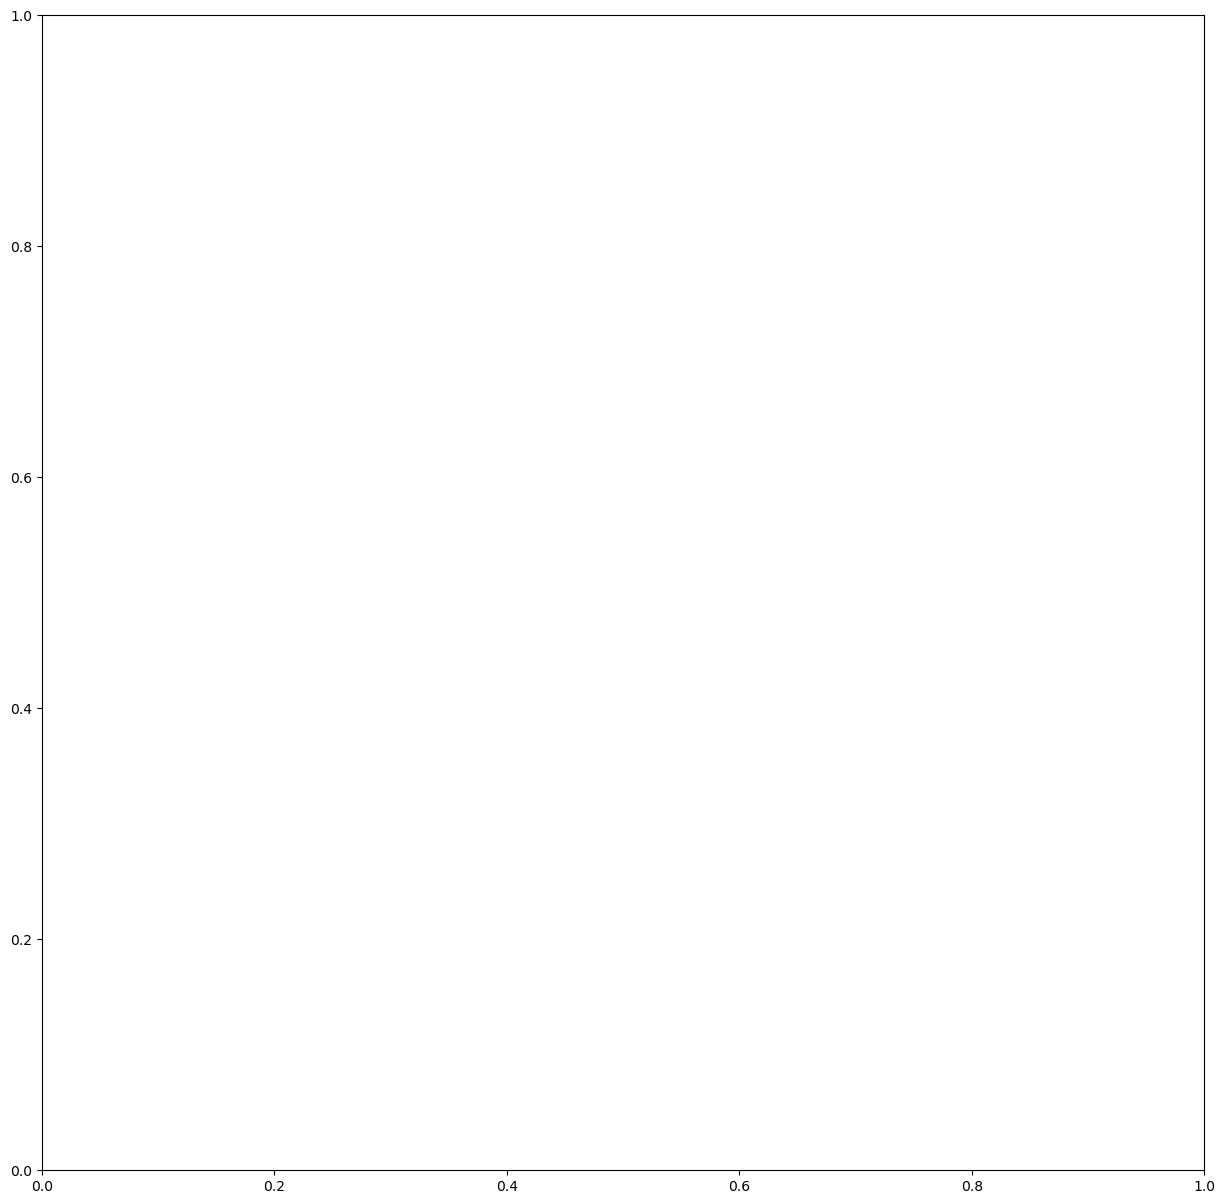

In [23]:
f, ax = plt.subplots(figsize=(15, 15))
ax.imshow(components[2000:3000, 1000:2000], cmap='viridis_r', interpolation='none')
f.tight_layout()